# Daily Challenge: Image Classification with Data Augmentation (Cats vs Dogs)
___________________

## What You Need to Do

### 1. Preprocess the Data:

   - Download and extract the Cats vs Dogs dataset here.
   - Use ImageDataGenerator to rescale and augment the training images (e.g., horizontal flip, rotation, zoom, and shifts).
   - Create separate generators for training and validation data.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import tensorflow as tf
import keras
import pandas as pd
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
zip_file_path = r'C:\Users\julie\Downloads\Dogs vs Cats.zip'
extract_folder = r'C:\Users\julie\Downloads\DogsvsCats'

if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [34]:
train_dir = r"C:\Users\julie\Downloads\DogsvsCats\train\train"
test_dir =  r"C:\Users\julie\Downloads\DogsvsCats\test\test"

The labels are in the file names! I created manually "cats" and "dogs" folders inside of the train folder.

In [35]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32

image_gen_train = ImageDataGenerator(rescale=1./255, 
                    rotation_range=45,
                    width_shift_range=.15,  
                    height_shift_range=.15, 
                    horizontal_flip=True, 
                    zoom_range=0.5, 
                    validation_split=0.2  
                    )


In [37]:
# Training data generator
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH), 
    class_mode='binary',  # cats vs dogs
    subset='training'  # Specify this generator is for training
)

# Validation data generator
val_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    subset='validation'  # Specify this generator is for validation
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### 2. Build the Model:

   - Create a CNN with:
       - Three convolutional layers with ReLU activation and max-pooling.
       - Dropout layers to reduce overfitting.
       - A fully connected layer with 512 units and ReLU activation.
       - An output layer with a single unit and sigmoid activation for binary classification.
   - Compile the model using the Adam optimizer and binary cross-entropy loss.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 3. Train the Model:

   - Train the model on the augmented training data for 15 epochs.
   - Use the validation data to monitor performance during training.


In [49]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)

Epoch 1/15
625/625 [==============================] - 434s 694ms/step - loss: 0.6421 - accuracy: 0.6219 - val_loss: 0.6285 - val_accuracy: 0.6372
Epoch 2/15
625/625 [==============================] - 422s 674ms/step - loss: 0.6068 - accuracy: 0.6649 - val_loss: 0.5664 - val_accuracy: 0.7043
Epoch 3/15
625/625 [==============================] - 426s 681ms/step - loss: 0.5744 - accuracy: 0.6930 - val_loss: 0.5560 - val_accuracy: 0.7105
Epoch 4/15
625/625 [==============================] - 420s 671ms/step - loss: 0.5617 - accuracy: 0.7072 - val_loss: 0.5603 - val_accuracy: 0.6987
Epoch 5/15
625/625 [==============================] - 413s 660ms/step - loss: 0.5464 - accuracy: 0.7177 - val_loss: 0.5380 - val_accuracy: 0.7316
Epoch 6/15
625/625 [==============================] - 421s 674ms/step - loss: 0.5315 - accuracy: 0.7308 - val_loss: 0.5140 - val_accuracy: 0.7484
Epoch 7/15
625/625 [==============================] - 403s 645ms/step - loss: 0.5205 - accuracy: 0.7423 - val_loss: 0.5257 -

### 4. Evaluate the Model:

   - Plot the training and validation accuracy and loss to detect overfitting.
   - Analyze the impact of data augmentation and dropout on model performance.


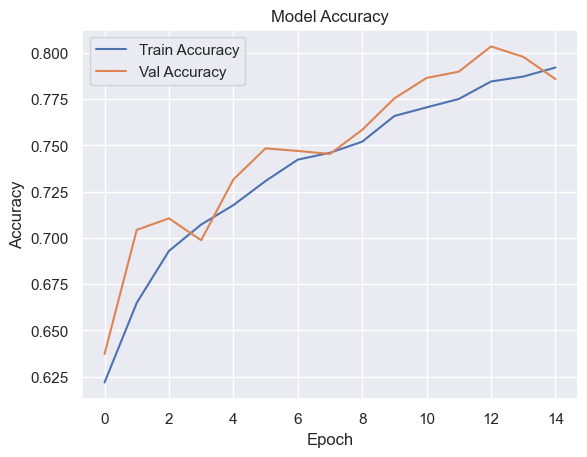

In [54]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We don't see signs of overfitting and the accuracy increases consistenty with the epochs.

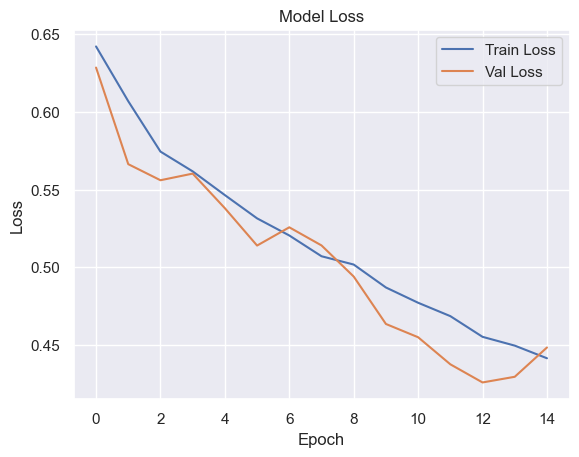

In [57]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Same with the loss. Both of the curves stay close together thanks to Data Augmentation and the use of Dropout in the model.